<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/L5_1_Image_Subtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

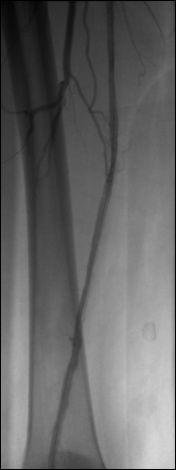

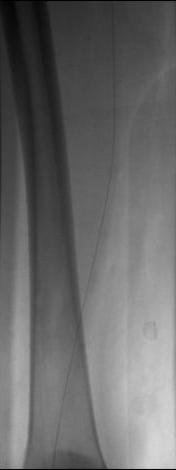

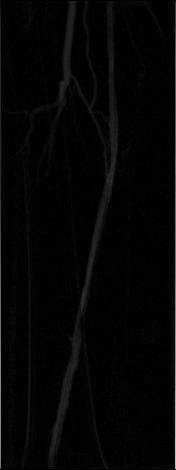

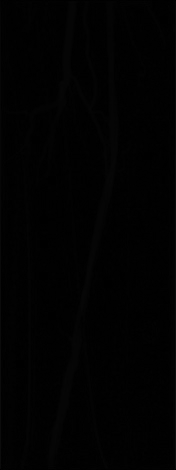

True

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import urllib.request

# load test images
live = urllib.request.urlopen('https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/live.jpg')
arr = np.asarray(bytearray(live.read()), dtype=np.uint8)
liveImg = cv2.imdecode(arr, -1) # 'Load it as it is'

mask = urllib.request.urlopen('https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/mask.jpg')
arr = np.asarray(bytearray(mask.read()), dtype=np.uint8)
maskImg = cv2.imdecode(arr, -1) # 'Load it as it is'

#liveImg = cv2.imread('https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/live.jpg')
#maskImg = cv2.imread('https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/mask.jpg')

# convert images to float data type
liveImg = liveImg.astype(float)
maskImg = maskImg.astype(float)

# calculate the difference between two images
diffImg = np.abs(maskImg - liveImg)
gamma = 0.5
diffImg_contrasted = np.power(diffImg, gamma)

# show images
cv2_imshow(liveImg)
cv2_imshow(maskImg)
cv2_imshow(diffImg)
cv2_imshow(diffImg_contrasted)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save images
cv2.imwrite('Image_Subtraction.jpg', diffImg)
cv2.imwrite('Image_Subtraction_with_contrast.jpg', diffImg_contrasted)